<br><br><br>

# 个人时间使用情况记录与分析报告

<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>

####                         姓名：王骁
#### 学号：201805750301
#### 班级：数据科学与大数据技术二班

<br><br><br><br>

分析报告要求:<br>
1. 用 Jupyter notebook 撰写.
1. 数据保存为 csv 格式, 数据样本格式见 time.csv, 用 excel 打开编辑，填写记录。
1. 共记录**两个星期**的完整数据, 从11月11号始, 到11月24号结束.
1. 计算**每天**睡眠(包括午休), 上课, 自习, 吃饭, 运动及其它时间花费的比例, 并做出每天的时间饼状图.
1. 画出**每天**睡眠总时长(包括午休)随日期变化线型图, 计算两个星期平均每天的睡眠时间.
1. 画出每天自习时间随日期变化的线型图, 计算两个星期平均每天的自习时间.
1. 基于已有数据，挖掘额外的有效信息，挖掘的**信息量越多、质量越高**，**分数越高**。
1. 报告中列出以上过程中代码和图形.
1. 总结分析自己的数据, 提出下一步的改进方向.

<br><br>

**导入库**

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import font_manager
import random

**导入本地CSV数据文件**

In [2]:
time_data = pd.read_csv("./time.csv")
time_data

,日期,起床时间,早上离开宿舍时间,晚上回到宿舍时间,上床睡觉时间,晚上睡眠总时长,午睡时长(分钟),是否吃早餐,三餐总时长(分钟),点外卖次数,上课总时间(分钟),运动总时间(分钟),自习总时间(分钟),其它时间(休闲娱乐社交社团等)(分钟)
0,2019.11.11,06:50,08:10,20:20,23:00,7:50,0,1,70,0,270,20,60,550
1,2019.11.12,07:10,07:30,22:20,23:00,8:10,50,1,60,0,330,20,180,310
2,2019.11.13,06:50,07:30,18:50,24:00,7:00,0,1,70,0,360,30,120,450
3,2019.11.14,07:00,08:40,21:00,23:20,8:00,0,1,65,0,270,50,90,485
4,2019.11.15,07:20,09:00,20:40,23:00,8:30,0,1,70,0,180,20,120,540
5,2019.11.16,07:30,08:20,21:30,23:20,8:20,30,1,80,0,0,20,240,570
6,2019.11.17,07:40,08:20,22:30,23:40,8:20,0,1,110,0,0,0,0,830
7,2019.11.18,08:00,09:30,20:50,22:30,8:30,0,1,65,0,270,20,60,455
8,2019.11.19,07:00,07:30,18:00,23:10,7:40,70,1,75,0,330,20,120,365
9,2019.11.20,06:50,07:30,19:50,23:20,7:20,0,1,70,0,360,30,120,480


<br><br><br><br><br><br>

**获取本地数据**

In [3]:
# 从文件数据中取出各列数据
night_sleep_time_str = time_data['晚上睡眠总时长']
noon_sleep_time = time_data['午睡时长(分钟)']
eat_time = time_data['三餐总时长(分钟)']
classes_time = time_data['上课总时间(分钟)']
sport_time = time_data['运动总时间(分钟)']
study_time = time_data['自习总时间(分钟)']
other_time = time_data['其它时间(休闲娱乐社交社团等)(分钟)']

# 处理一些单位换算问题
# 晚上睡眠总时间（分钟）
night_sleep_time = np.arange(14).reshape(14,1).astype(np.float64)
for i in np.arange(14):
    temp_list = list(night_sleep_time_str[i])
    night_sleep_time[i] = 60 * int(temp_list[0]) + int(temp_list[2]+temp_list[3])

# 睡眠总时间
sleep_time = np.arange(14).reshape(14,1).astype(np.float64)
for i in np.arange(14):
    sleep_time[i] = night_sleep_time[i] + noon_sleep_time[i]

# 起床时间
get_up_time = np.arange(14).reshape(14,1).astype(np.float64)
for i in np.arange(14):
    temp_list = list(time_data['起床时间'][i])
    get_up_time[i] = 60 * int(temp_list[1]) + int(temp_list[-2]+temp_list[-1])

<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>

### **每天**睡眠, 上课, 自习, 吃饭, 运动及其它时间花费的比例, 与每天的时间饼状图.

In [4]:
# 计算时间比例
time = time_data['日期']
columns = ["总时间(分钟)","sleep","classes","study","eat","sport","other"]
sleep = np.empty_like(time, dtype='float')
classes = np.empty_like(time, dtype='float')
study = np.empty_like(time, dtype='float')
eat = np.empty_like(time, dtype='float')
sport = np.empty_like(time, dtype='float')
other = np.empty_like(time, dtype='float')
proportion_data = pd.DataFrame(np.arange(14*7).reshape(14,7),index=time,columns=columns)
temp_s = np.arange(14).reshape(14,1).astype(np.float64)
for i in np.arange(14):
    temp_s[i] = sleep_time[i]+classes_time[i]+study_time[i]+eat_time[i]+sport_time[i]+other_time[i]
    sleep[i] = sleep_time[i]/temp_s[i]
    classes[i] = classes_time[i]/temp_s[i]
    study[i] = study_time[i]/temp_s[i]
    eat[i] = eat_time[i]/temp_s[i]
    sport[i] = sport_time[i]/temp_s[i]
    other[i] = other_time[i]/temp_s[i]
proportion_data['总时间(分钟)'] = temp_s
proportion_data['sleep'] = sleep
proportion_data['classes'] = classes
proportion_data['study'] = study
proportion_data['eat'] = eat
proportion_data['sport'] = sport
proportion_data['other'] = other
proportion_data

,总时间(分钟),sleep,classes,study,eat,sport,other
日期,,,,,,,
2019.11.11,1440.0,0.326389,0.187500,0.041667,0.048611,0.013889,0.381944
2019.11.12,1440.0,0.375000,0.229167,0.125000,0.041667,0.013889,0.215278
2019.11.13,1450.0,0.289655,0.248276,0.082759,0.048276,0.020690,0.310345
2019.11.14,1440.0,0.333333,0.187500,0.062500,0.045139,0.034722,0.336806
2019.11.15,1440.0,0.354167,0.125000,0.083333,0.048611,0.013889,0.375000
2019.11.16,1440.0,0.368056,0.000000,0.166667,0.055556,0.013889,0.395833
2019.11.17,1440.0,0.347222,0.000000,0.000000,0.076389,0.000000,0.576389
2019.11.18,1380.0,0.369565,0.195652,0.043478,0.047101,0.014493,0.329710
2019.11.19,1440.0,0.368056,0.229167,0.083333,0.052083,0.013889,0.253472


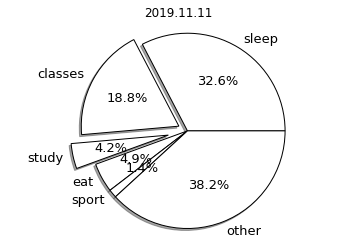

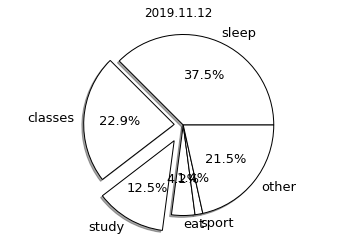

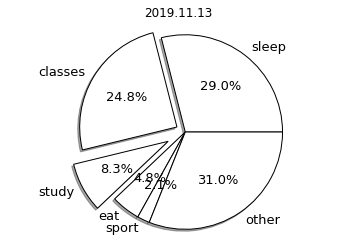

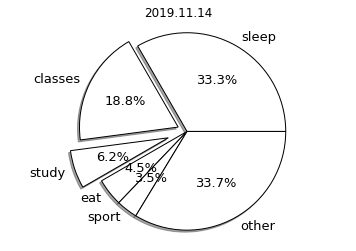

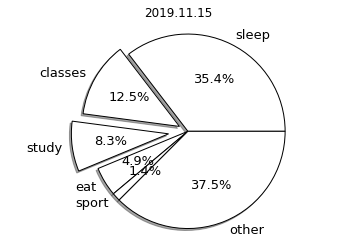

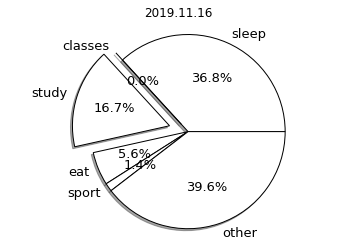

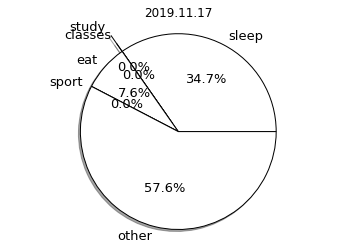

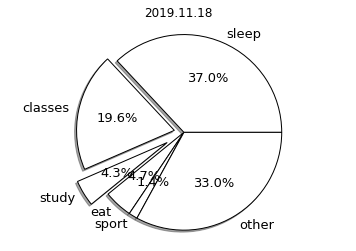

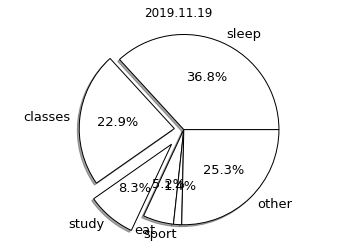

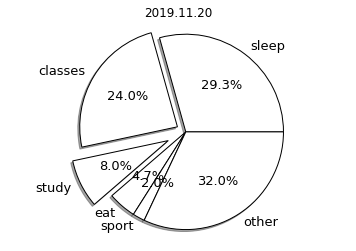

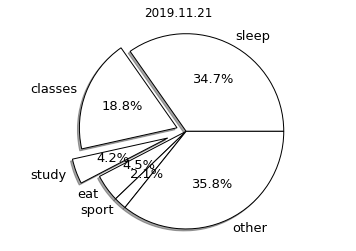

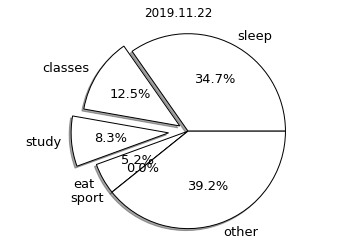

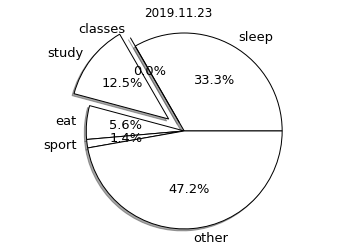

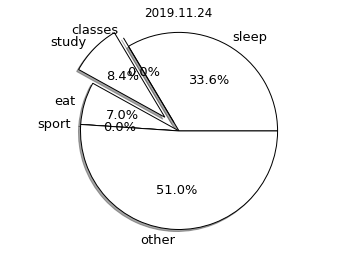

In [5]:
# 绘制饼状图
labels = "sleep","classes","study","eat","sport","other"
explode = (0, 0.1, 0.2, 0, 0, 0)
colors = ("#ffffff","#ffffff","#ffffff","#ffffff","#ffffff","#ffffff")
for i in np.arange(14):
    sizes = list(proportion_data.loc[proportion_data.index[i],["sleep","classes","study","eat","sport","other"]])
    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, 
            colors=colors,startangle=0 ,wedgeprops = {'linewidth': 1, 'edgecolor':'black'},
            textprops = {'fontsize':13 ,'color':'k'})
    plt.title(proportion_data.index[i])
    ax1.axis('equal')
    plt.savefig("./11月"+str(i+11)+"日.svg")
    plt.show()

### **每天**睡眠总时长随日期变化线型图, 及两个星期平均每天的睡眠时间.

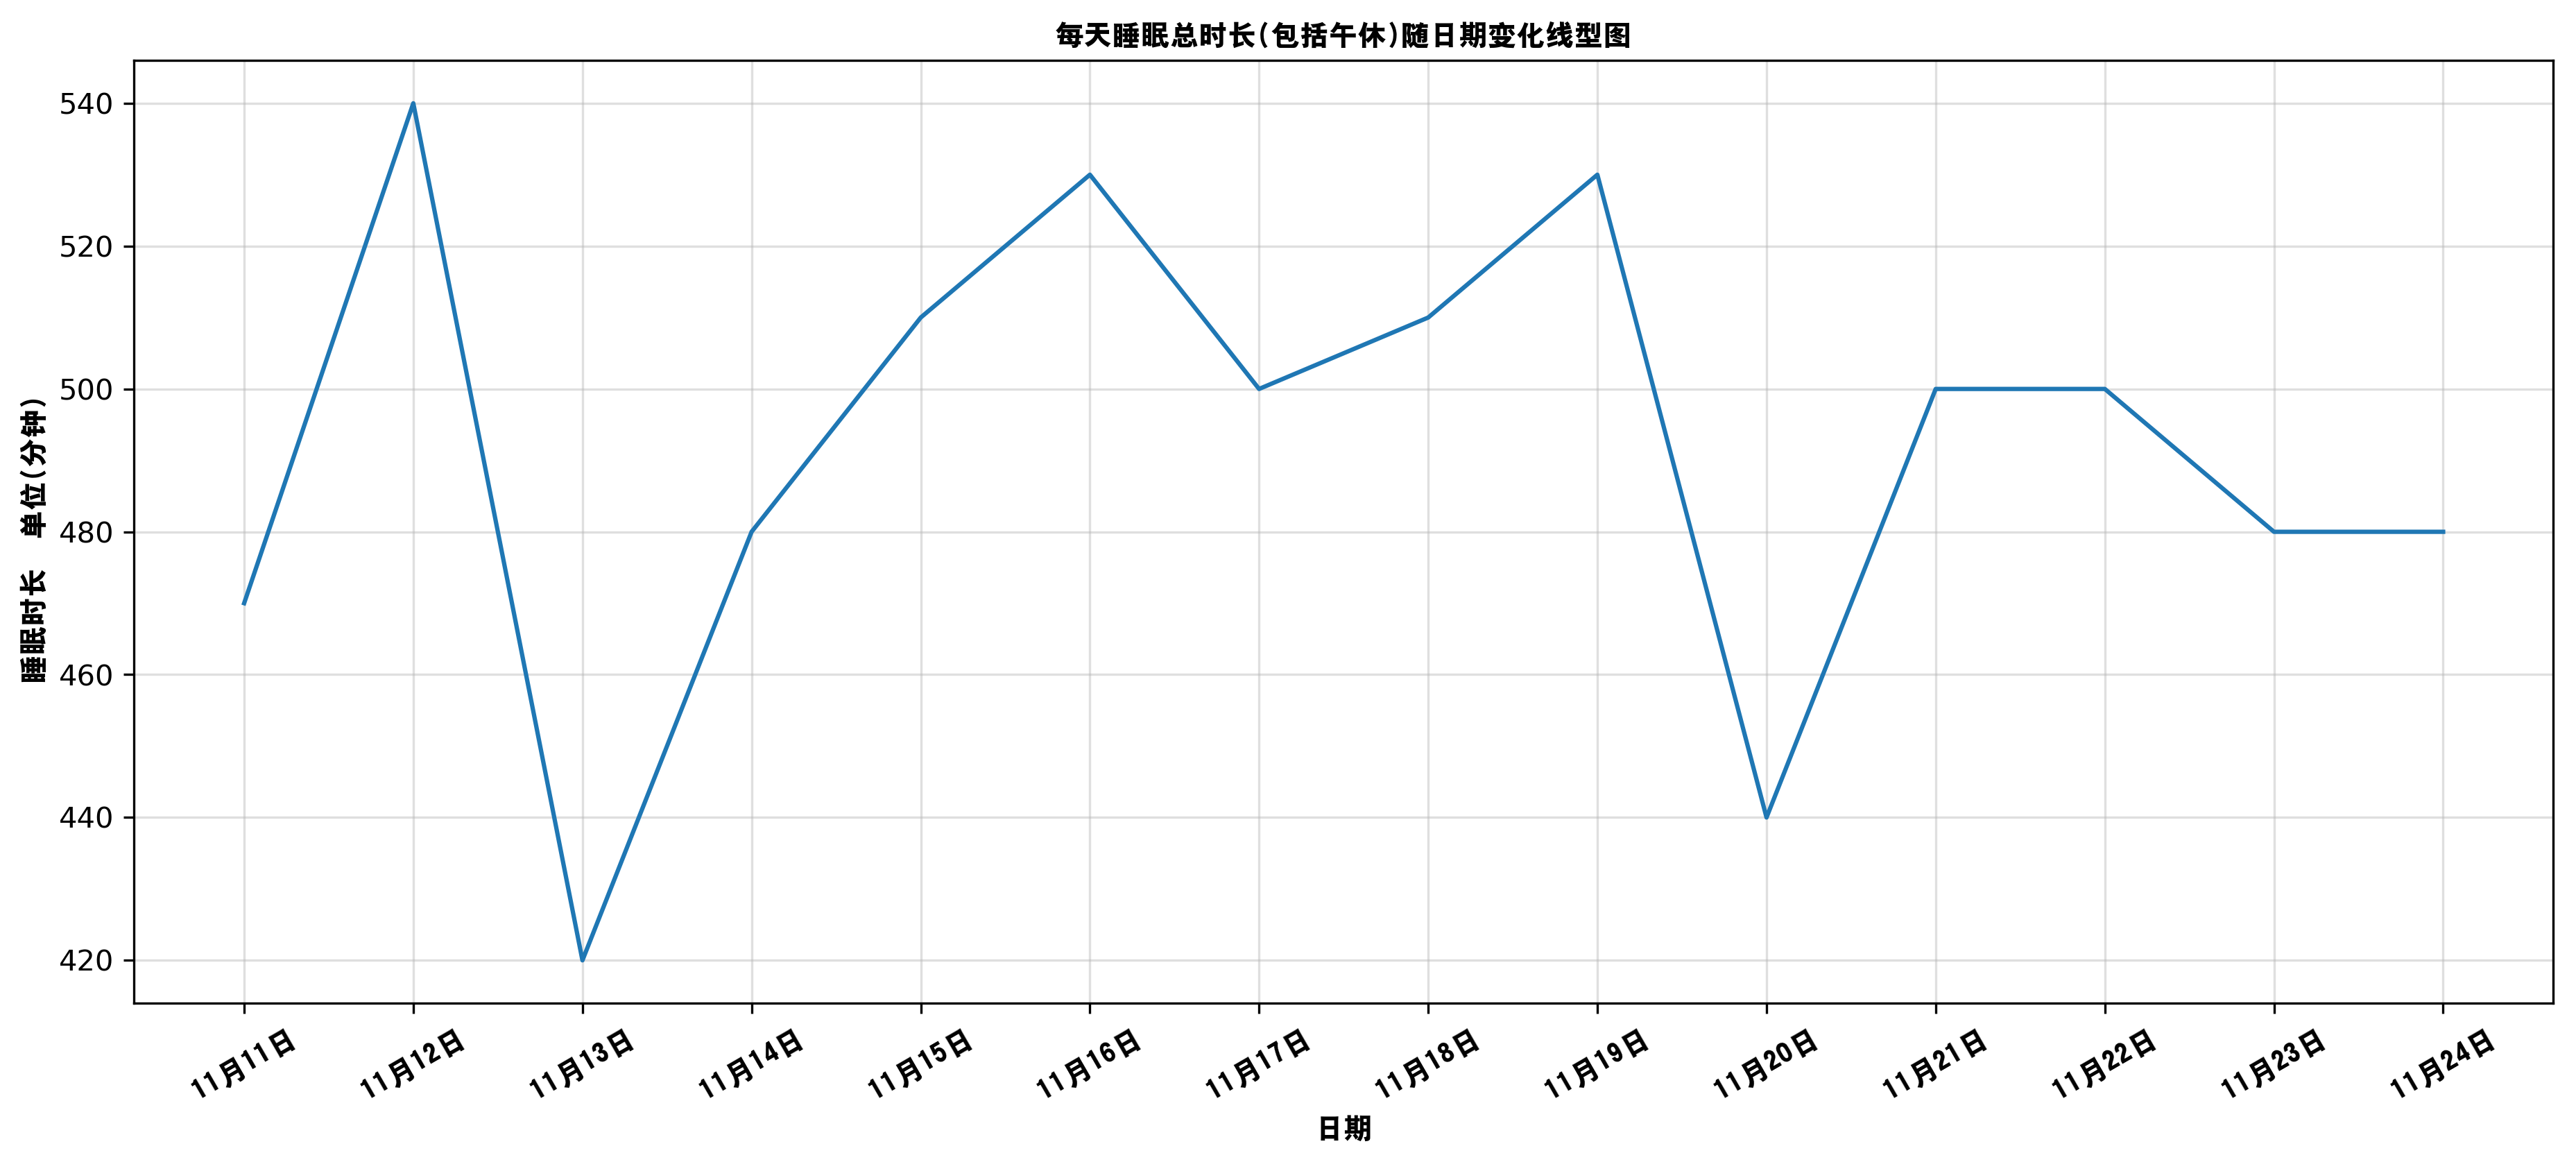

In [6]:
# 绘制线型图
my_font = font_manager.FontProperties(fname = '汉仪粗黑简.ttf')            # 指定中文文字字体
fig = plt.figure(figsize = (15, 6), dpi = 300)                           
x = range(0,14)
y = sleep_time
_xtick_labels = ["11月{}日".format(i) for i in range(11,25)]
plt.xticks(list(x),_xtick_labels,rotation=30,fontproperties=my_font)
plt.plot(x, y)
plt.grid(alpha = 0.4)
plt.xlabel("日期", fontproperties=my_font)
plt.ylabel("睡眠时长  单位(分钟）", fontproperties=my_font,)
plt.title("每天睡眠总时长(包括午休)随日期变化线型图", fontproperties=my_font)
plt.savefig("./睡眠时长变化线形图.png")
plt.show()

In [7]:
# 平均时间
average_daily_sleep_time = np.mean(sleep_time)
print("日睡眠时间为%.2f分钟" % average_daily_sleep_time)

日睡眠时间为492.14分钟


<br><br><br>

### 每天自习时间随日期变化的线型图, 及两个星期平均每天的自习时间.

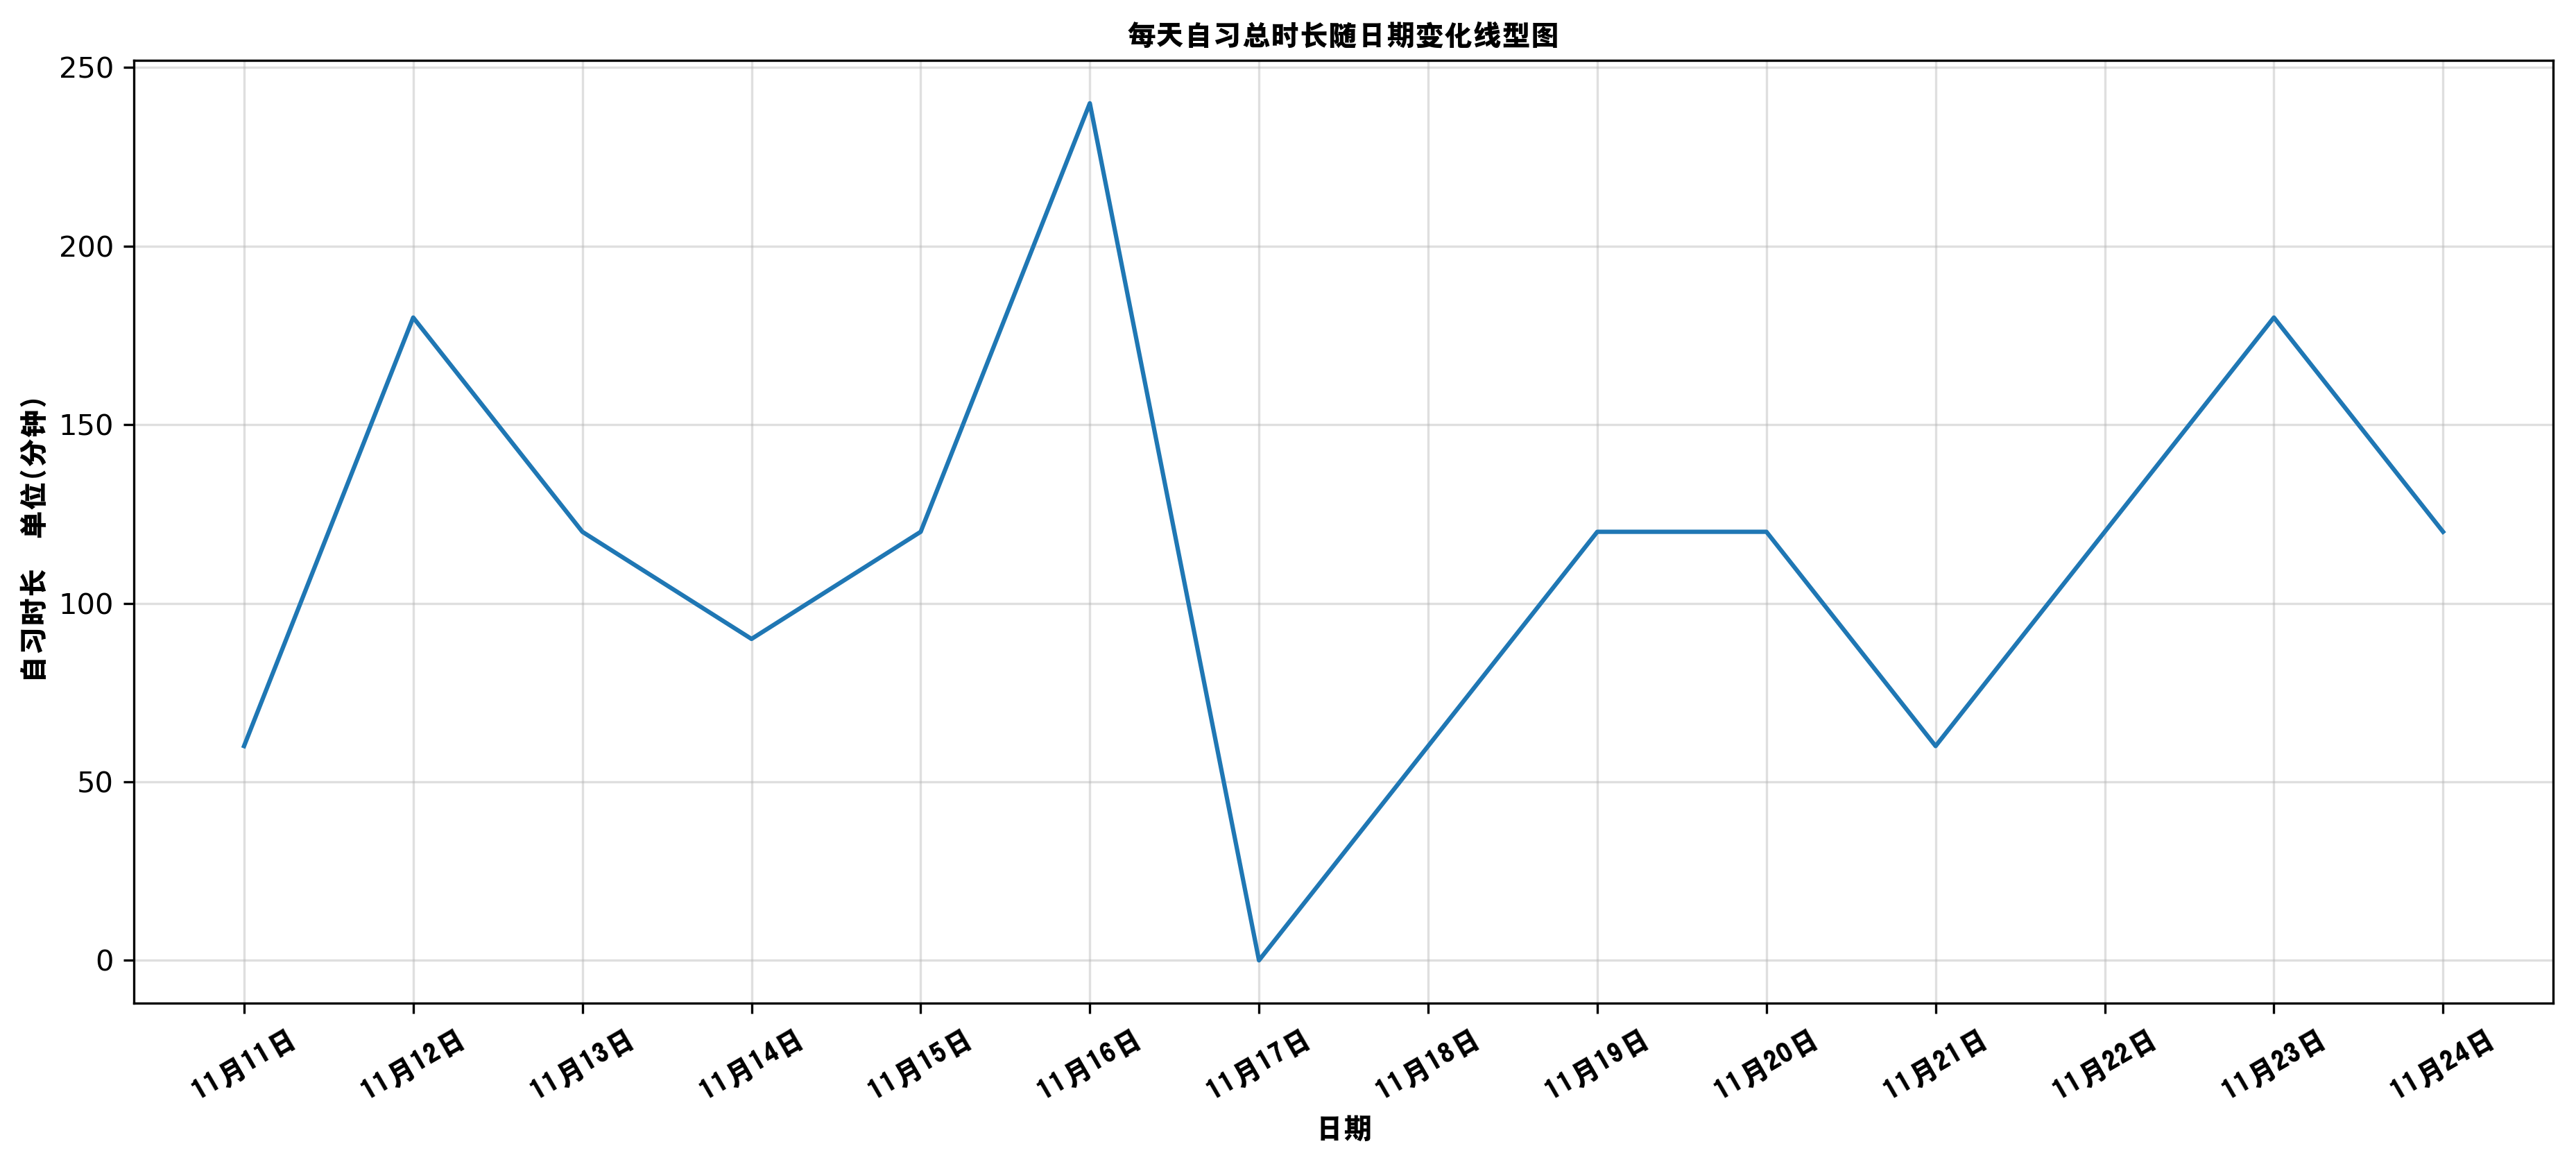

In [8]:
# 绘制线型图
my_font = font_manager.FontProperties(fname = '汉仪粗黑简.ttf')
fig = plt.figure(figsize = (15, 6), dpi = 300)
x = range(0,14)
y = study_time
_xtick_labels = ["11月{}日".format(i) for i in range(11,25)]
plt.xticks(list(x),_xtick_labels,rotation=30,fontproperties=my_font)
plt.plot(x, y)
plt.grid(alpha = 0.4)
plt.xlabel("日期", fontproperties=my_font)
plt.ylabel("自习时长  单位(分钟）", fontproperties=my_font)
plt.title("每天自习总时长随日期变化线型图", fontproperties=my_font)
plt.savefig("./自习时长变化线形图.png")
plt.show()

In [9]:
# 计算平均时间
average_daily_study_time = np.mean(study_time)
print("日自习时间为%.2f分钟" % average_daily_study_time)

日自习时间为113.57分钟


<br><br><br><br><br><br><br><br>

<br><br>

### 起床时间随日期变化线型图

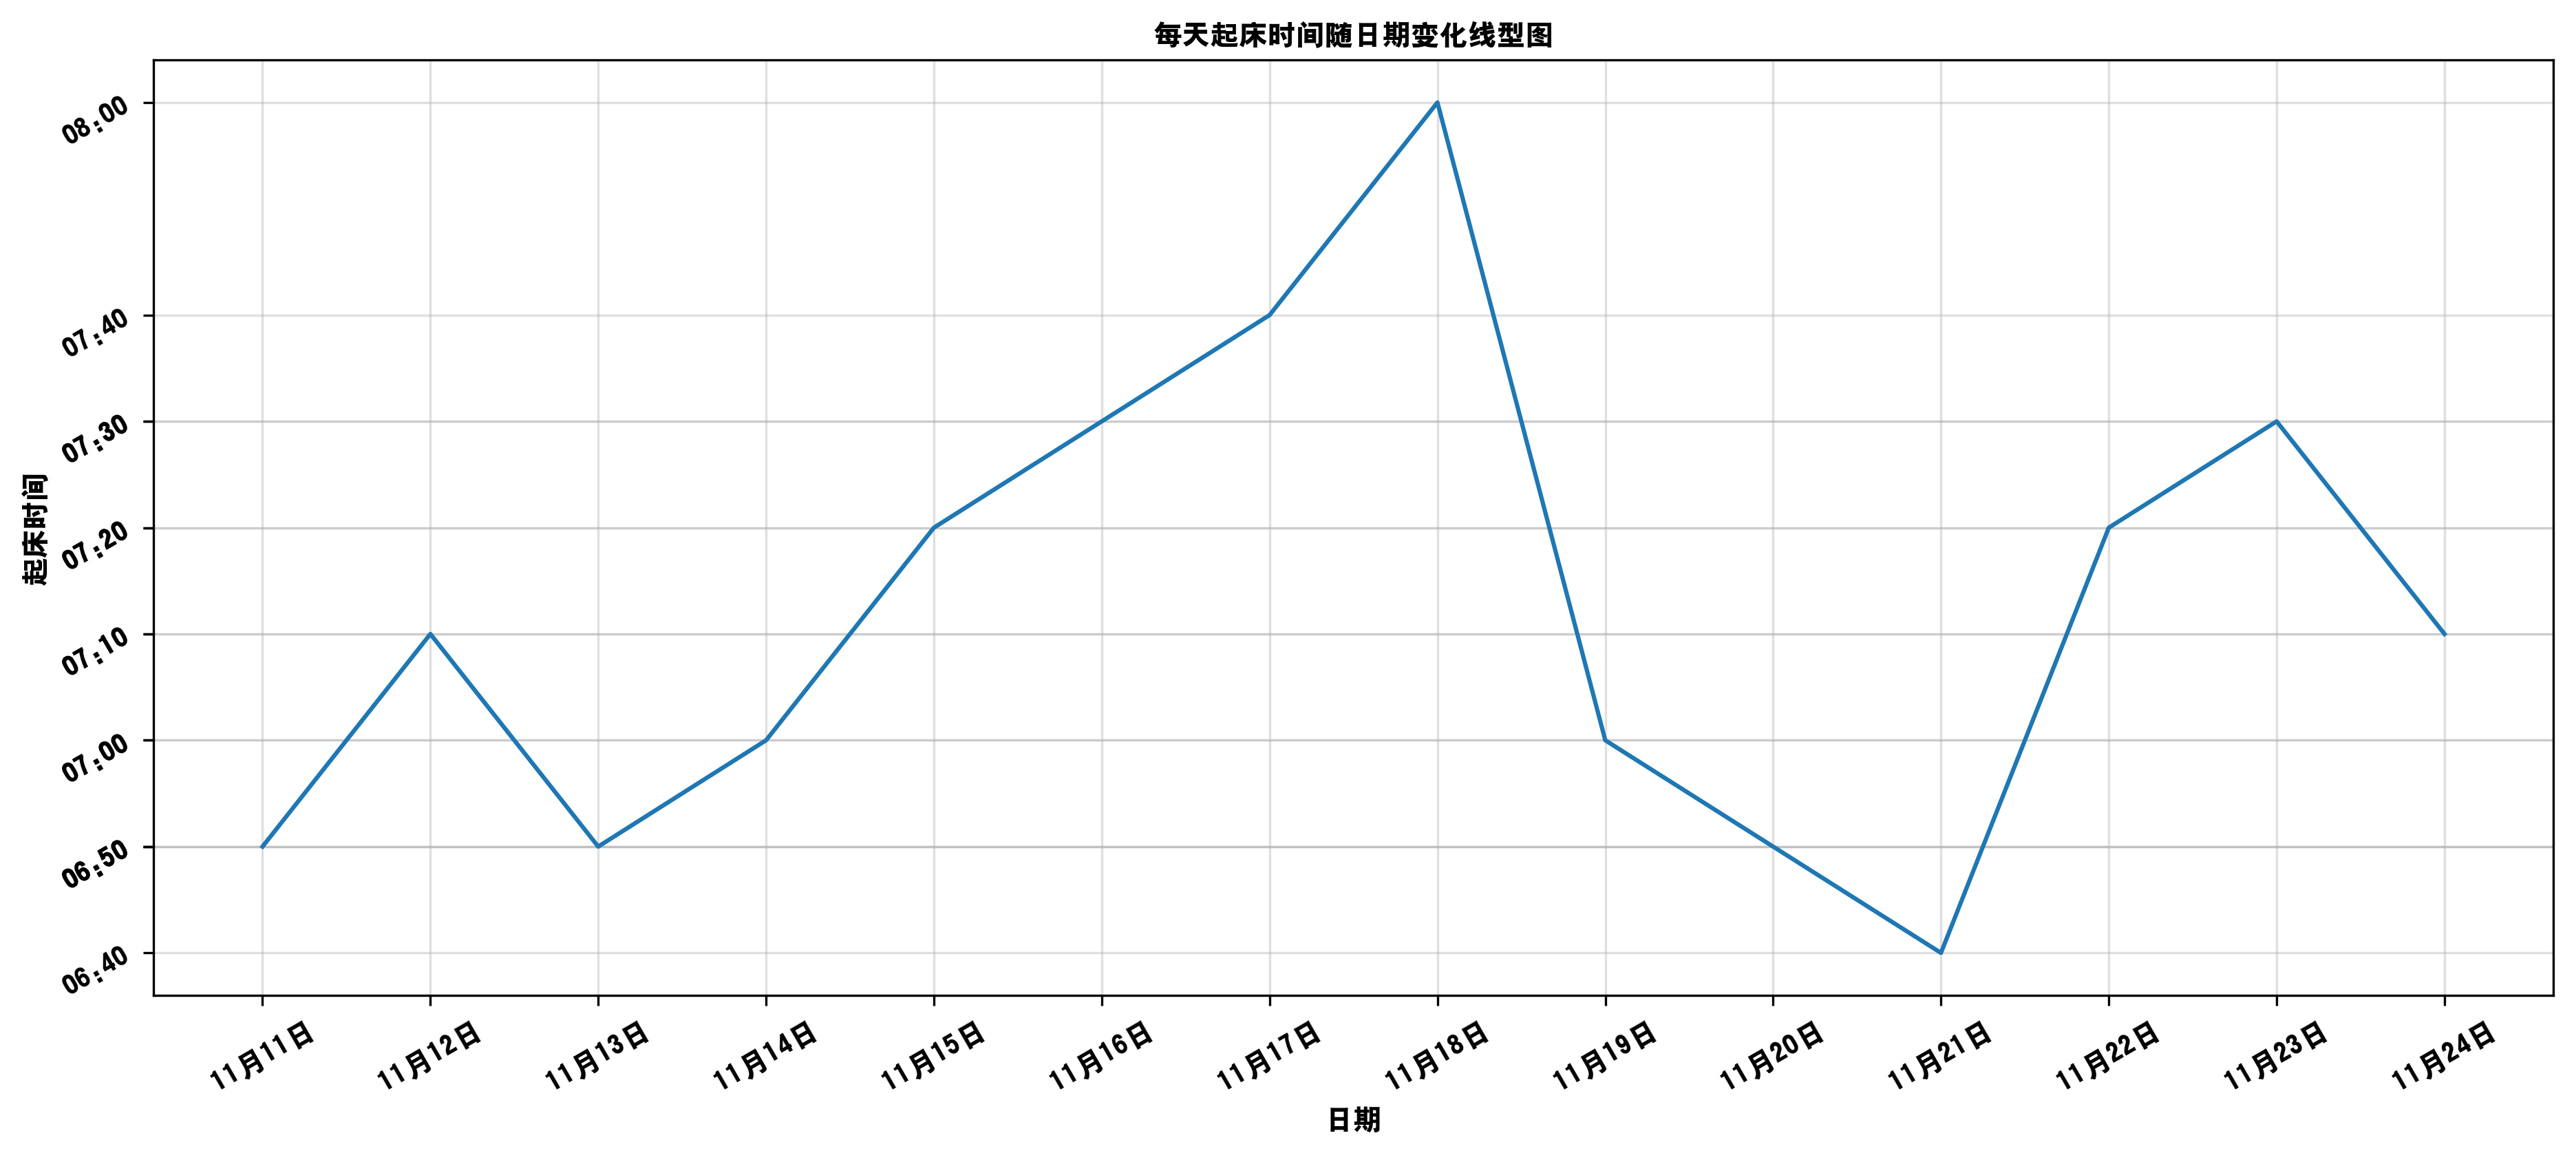

In [11]:
my_font = font_manager.FontProperties(fname = '汉仪粗黑简.ttf')
fig = plt.figure(figsize = (15, 6), dpi = 300)
x = range(0,14)
y = get_up_time
_xtick_labels = ["11月{}日".format(i) for i in range(11,25)]
plt.xticks(list(x),_xtick_labels,rotation=30,fontproperties=my_font)
_ytick_labels = list(time_data['起床时间'])
#['06:50','07:10','06:50','07:00','07:20','07:30','07:40',
 #                '08:00','07:00','06:50','06:40','07:20','07:30','07:10']
plt.yticks(list(y),_ytick_labels,rotation=30,fontproperties=my_font)
plt.plot(x, y)
plt.grid(alpha = 0.4)
plt.xlabel("日期", fontproperties=my_font)
plt.ylabel("起床时间", fontproperties=my_font)
plt.title("每天起床时间随日期变化线型图", fontproperties=my_font)
plt.savefig("./起床时间变化线形图.png")
plt.show()

<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>

### 其他时间在一天中的占比

In [12]:
proportion_data['other']

日期
2019.11.11    0.381944
2019.11.12    0.215278
2019.11.13    0.310345
2019.11.14    0.336806
2019.11.15    0.375000
2019.11.16    0.395833
2019.11.17    0.576389
2019.11.18    0.329710
2019.11.19    0.253472
2019.11.20    0.320000
2019.11.21    0.357639
2019.11.22    0.392361
2019.11.23    0.472222
2019.11.24    0.510490
Name: other, dtype: float64

### 运动时间在一天中的占比

In [13]:
proportion_data['sport']

日期
2019.11.11    0.013889
2019.11.12    0.013889
2019.11.13    0.020690
2019.11.14    0.034722
2019.11.15    0.013889
2019.11.16    0.013889
2019.11.17    0.000000
2019.11.18    0.014493
2019.11.19    0.013889
2019.11.20    0.020000
2019.11.21    0.020833
2019.11.22    0.000000
2019.11.23    0.013889
2019.11.24    0.000000
Name: sport, dtype: float64

<br><br><br><br><br><br>

### 自习时间在一天中的占比

In [14]:
proportion_data['study']

日期
2019.11.11    0.041667
2019.11.12    0.125000
2019.11.13    0.082759
2019.11.14    0.062500
2019.11.15    0.083333
2019.11.16    0.166667
2019.11.17    0.000000
2019.11.18    0.043478
2019.11.19    0.083333
2019.11.20    0.080000
2019.11.21    0.041667
2019.11.22    0.083333
2019.11.23    0.125000
2019.11.24    0.083916
Name: study, dtype: float64

## 总结分析与改进方向

### 总结分析

1. 日学习时间占比较少，受课程与大块空闲时间影响严重，且主要体现在
    * 早上起来对学习等事物的敏感性较低，无法直接高效的进入学习的状态，往往花费了很多时间却只做了一点点事（不仅限于学习，也包括一些其他的事）。
    * 对两节课时的空闲利用不充分，往往就“荒废”了。
1. 上床睡觉时间较晚，导致第二天起床时间也晚。
1. 每日运动时长低，虽然其他部分中也会有一些其他运动的时长，但总体来说，对运动的重视还有些欠缺。

一些真正有效运用好的时间真的只占少数，对时间的利用率不高，

### 改进方向

1. 早睡早起。
1. 多抽出一些时间运动。
1. 明确每一时段的目的，提高对时间的利用效率。